<a href="https://colab.research.google.com/github/jespimentel/atos_cgmp/blob/main/eSAJ_CGMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do arquivo "atos.csv" do eSAJ para fins correicionais

José Eduardo de Souza Pimentel

https://github.com/jespimentel

Instruções:
1. Gere os arquivos "csv" selecionando o foro e o período de interesse.
2. Certifique-se de selecionar "ambas" nos "checkboxes" para cada um deles.

In [1]:
# Importações e configurações
import pandas as pd
import matplotlib.pyplot as plt

import glob

In [2]:
# Estratégia para a leitura de múltiplos arquivos csv.
caminho = '/content/a*.csv'

arquivos_csv = glob.glob(caminho)

atos = pd.DataFrame()

for arquivo in arquivos_csv:
    df_temp = pd.read_csv (arquivo, sep = ';', encoding='ISO-8859-1', on_bad_lines='skip')
    atos = pd.concat([atos, df_temp], ignore_index=True)

In [3]:
atos = atos.dropna(subset=['Disponibilização', 'Data da intimação'])
atos['Disponibilização'] = pd.to_datetime(atos['Disponibilização'], format='%d/%m/%Y', errors='coerce')
atos['Data da intimação'] = pd.to_datetime(atos['Data da intimação'], format='%d/%m/%Y', errors='coerce')

In [4]:
display(atos.drop(columns='Recebido por').head(5))

,Número do processo,Foro,Vara,Especialização,Cargo,Disponibilização,Prazo processual,Movimentação,Teor da intimação,Classe principal,Assunto principal,Natureza da comunicação,Situação,Tarjas,Data da intimação
0,1500786-72.2023.8.26.0451,Foro de Piracicaba,4ª Vara Criminal,Criminal,050º PROMOTOR DE JUSTIÇA,2024-02-29,6 dias,Ato Ordinatório - Intimação - Portal,Ato Ordinatório - Vista ao Ministério Público ...,Inquérito Policial,Receptação,Intimação,Pendente,Atuação do Ministério Público,2024-02-29
1,1532291-18.2022.8.26.0451,Foro de Piracicaba,4ª Vara Criminal,Criminal,050º PROMOTOR DE JUSTIÇA,2024-02-29,6 dias,Ato Ordinatório - Intimação - Portal,Ato Ordinatório - Vista ao Ministério Público ...,Inquérito Policial,Aborto provocado por terceiro,Intimação,Pendente,Estatuto do Idoso|Atuação do Ministério Público,2024-02-29
2,1500003-83.2023.8.26.0450,Foro de Piracicaba,4ª Vara Criminal,Criminal,050º PROMOTOR DE JUSTIÇA,2024-02-29,6 dias,Ato Ordinatório - Intimação - Portal,Ato Ordinatório - Vista ao Ministério Público ...,Inquérito Policial,Estelionato,Intimação,Pendente,Atuação do Ministério Público,2024-02-29
3,1532289-48.2022.8.26.0451,Foro de Piracicaba,4ª Vara Criminal,Criminal,050º PROMOTOR DE JUSTIÇA,2024-02-29,6 dias,Ato Ordinatório - Intimação - Portal,Ato Ordinatório - Vista ao Ministério Público ...,Inquérito Policial,Estelionato,Intimação,Pendente,Atuação do Ministério Público,2024-02-29
4,1509621-83.2022.8.26.0451,Foro de Piracicaba,4ª Vara Criminal,Criminal,050º PROMOTOR DE JUSTIÇA,2024-02-29,6 dias,Ato Ordinatório - Intimação - Portal,Ato Ordinatório - Vista ao Ministério Público ...,Inquérito Policial,Roubo,Intimação,Pendente,Estatuto do Idoso|Atuação do Ministério Público,2024-02-29


In [5]:
data_min_disponibilizacao = atos['Disponibilização'].min().strftime('%d/%m/%Y')
data_max_disponibilizacao = atos['Disponibilização'].max().strftime('%d/%m/%Y')

data_min_intimacao = atos['Data da intimação'].min().strftime('%d/%m/%Y')
data_max_intimacao = atos['Data da intimação'].max().strftime('%d/%m/%Y')

periodo_total = atos['Data da intimação'].max() - atos['Data da intimação'].min()

print(f'Disponibilizações entre {data_min_disponibilizacao} e {data_max_disponibilizacao}')
print(f'Intimações entre {data_min_intimacao} e {data_max_intimacao}')
print(f'Total de dias: {periodo_total.days}')

Disponibilizações entre 14/11/2023 e 29/02/2024
Intimações entre 01/12/2023 e 29/02/2024
Total de dias: 90


In [6]:
atos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19896 entries, 0 to 19895
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Número do processo       19896 non-null  object        
 1   Foro                     19896 non-null  object        
 2   Vara                     19896 non-null  object        
 3   Especialização           19890 non-null  object        
 4   Cargo                    19892 non-null  object        
 5   Disponibilização         19896 non-null  datetime64[ns]
 6   Prazo processual         19896 non-null  object        
 7   Movimentação             19896 non-null  object        
 8   Teor da intimação        19896 non-null  object        
 9   Classe principal         19896 non-null  object        
 10  Assunto principal        19884 non-null  object        
 11  Natureza da comunicação  19896 non-null  object        
 12  Situação                 19896 n

In [7]:
# Adequação dos dados

atos['Prazo'] = atos['Prazo processual'].str.extract('(\d+)').astype(int)
atos['Dias Decorridos'] = (atos['Data da intimação'] - atos['Disponibilização']).dt.days

In [8]:
# Salva o dataframe em Excel
atos.to_excel("atos.xlsx", sheet_name='Controle', index=False)

# Visão geral

In [9]:
titulo = f'Interações totais por cargo entre {data_min_disponibilizacao} e {data_max_disponibilizacao}\n\n'
visao_geral = atos.groupby('Cargo')['Número do processo'].count()
print(titulo, visao_geral.sort_values(ascending=False))

markdown_table = visao_geral.to_markdown()
with open ('visao_geral.md', 'w') as file:
  file.write(titulo)
  file.write(markdown_table)

Interações totais por cargo entre 14/11/2023 e 29/02/2024

 Cargo
012º PROMOTOR DE JUSTIÇA    2541
005º PROMOTOR DE JUSTIÇA    1815
002º PROMOTOR DE JUSTIÇA    1302
015º PROMOTOR DE JUSTIÇA    1267
011º PROMOTOR DE JUSTIÇA    1183
010º PROMOTOR DE JUSTIÇA    1175
014º PROMOTOR DE JUSTIÇA    1133
008º PROMOTOR DE JUSTIÇA    1098
009º PROMOTOR DE JUSTIÇA    1041
006º PROMOTOR DE JUSTIÇA    1017
013º PROMOTOR DE JUSTIÇA    1004
007º PROMOTOR DE JUSTIÇA     963
004º PROMOTOR DE JUSTIÇA     880
017º PROMOTOR DE JUSTIÇA     858
050º PROMOTOR DE JUSTIÇA     715
016º PROMOTOR DE JUSTIÇA     711
003º PROMOTOR DE JUSTIÇA     616
001º PROMOTOR DE JUSTIÇA     523
150º PROMOTOR DE JUSTIÇA      40
100º PROMOTOR DE JUSTIÇA       7
020º PROMOTOR DE JUSTIÇA       2
101º PROMOTOR DE JUSTIÇA       1
Name: Número do processo, dtype: int64


In [10]:
titulo = f'Procedimentos únicos por cargo entre {data_min_disponibilizacao} e {data_max_disponibilizacao}\n\n'
procedimentos_unicos = atos.groupby('Cargo')['Número do processo'].nunique()
print(titulo, procedimentos_unicos.sort_values(ascending=False))

markdown_table = procedimentos_unicos.to_markdown()
with open ('procedimentos_unicos.md', 'w') as file:
  file.write(titulo)
  file.write(markdown_table)

Procedimentos únicos por cargo entre 14/11/2023 e 29/02/2024

 Cargo
012º PROMOTOR DE JUSTIÇA    1633
005º PROMOTOR DE JUSTIÇA    1365
002º PROMOTOR DE JUSTIÇA     936
015º PROMOTOR DE JUSTIÇA     916
014º PROMOTOR DE JUSTIÇA     775
008º PROMOTOR DE JUSTIÇA     751
011º PROMOTOR DE JUSTIÇA     688
007º PROMOTOR DE JUSTIÇA     657
010º PROMOTOR DE JUSTIÇA     639
017º PROMOTOR DE JUSTIÇA     631
006º PROMOTOR DE JUSTIÇA     616
013º PROMOTOR DE JUSTIÇA     612
004º PROMOTOR DE JUSTIÇA     573
009º PROMOTOR DE JUSTIÇA     563
050º PROMOTOR DE JUSTIÇA     544
001º PROMOTOR DE JUSTIÇA     441
016º PROMOTOR DE JUSTIÇA     434
003º PROMOTOR DE JUSTIÇA     390
150º PROMOTOR DE JUSTIÇA      16
100º PROMOTOR DE JUSTIÇA       5
020º PROMOTOR DE JUSTIÇA       1
101º PROMOTOR DE JUSTIÇA       1
Name: Número do processo, dtype: int64


# Análise de prontidão

In [11]:
atos = atos [['Número do processo', 'Classe principal', 'Vara', 'Cargo', 'Prazo', 'Recebido por', 'Disponibilização', 'Data da intimação', 'Dias Decorridos']]
atos.sort_values(by='Dias Decorridos', ascending=False).drop(columns=['Recebido por']).head(10)

,Número do processo,Classe principal,Vara,Cargo,Prazo,Disponibilização,Data da intimação,Dias Decorridos
17621,0013749-02.2017.8.26.0451,Pedido de Busca e Apreensão Criminal,2ª Vara Criminal,150º PROMOTOR DE JUSTIÇA,0,2023-12-07,2024-01-22,46
15744,1017176-77.2023.8.26.0451,Procedimento Investigatório Criminal (PIC-MP),1ª Vara Criminal,008º PROMOTOR DE JUSTIÇA,10,2023-12-15,2024-01-29,45
15741,1017173-25.2023.8.26.0451,Procedimento Investigatório Criminal (PIC-MP),1ª Vara Criminal,008º PROMOTOR DE JUSTIÇA,10,2023-12-15,2024-01-29,45
17254,1016081-46.2022.8.26.0451,Procedimento Especial da Lei Antitóxicos,4ª Vara Criminal,150º PROMOTOR DE JUSTIÇA,10,2023-12-11,2024-01-24,44
17265,1008659-64.2015.8.26.0451,Recuperação Judicial,4ª Vara Cível,008º PROMOTOR DE JUSTIÇA,10,2023-12-11,2024-01-22,42
17363,1025202-64.2023.8.26.0451,Procedimento Comum Cível,3ª Vara de Família e Sucessões,008º PROMOTOR DE JUSTIÇA,10,2023-12-11,2024-01-22,42
15475,1000632-92.2015.8.26.0451,Execução de Alimentos,3ª Vara de Família e Sucessões,008º PROMOTOR DE JUSTIÇA,10,2023-12-15,2024-01-22,38
15034,1002386-93.2020.8.26.0451,Procedimento Comum Cível,4ª Vara Cível,008º PROMOTOR DE JUSTIÇA,10,2023-12-18,2024-01-25,38
14640,1013168-57.2023.8.26.0451,Procedimento Comum Cível,4ª Vara Cível,008º PROMOTOR DE JUSTIÇA,10,2023-12-19,2024-01-25,37
17404,1002140-66.2021.8.26.0450,Busca e Apreensão em Alienação Fiduciária,4ª Vara Cível,008º PROMOTOR DE JUSTIÇA,10,2023-12-11,2024-01-17,37


In [12]:
print('Top 10 - Máximo de dias decorridos desde a disponibilização')
max_dias_decorridos = atos.groupby(['Cargo'])['Dias Decorridos'].max().sort_values(ascending=False)
display(max_dias_decorridos.head(10))

Top 10 - Máximo de dias decorridos desde a disponibilização


Cargo
150º PROMOTOR DE JUSTIÇA    46
008º PROMOTOR DE JUSTIÇA    45
007º PROMOTOR DE JUSTIÇA    27
001º PROMOTOR DE JUSTIÇA    26
013º PROMOTOR DE JUSTIÇA    25
004º PROMOTOR DE JUSTIÇA    25
100º PROMOTOR DE JUSTIÇA    22
014º PROMOTOR DE JUSTIÇA    21
050º PROMOTOR DE JUSTIÇA    21
016º PROMOTOR DE JUSTIÇA    21
Name: Dias Decorridos, dtype: int64

In [13]:
print('Top 10 - Média de dias decorridos desde a disponibilização')
media_dias_decorridos = atos.groupby(['Cargo'])['Dias Decorridos'].mean().round(2).sort_values(ascending=False)
display(media_dias_decorridos.head(10))

Top 10 - Média de dias decorridos desde a disponibilização


Cargo
150º PROMOTOR DE JUSTIÇA    7.98
100º PROMOTOR DE JUSTIÇA    6.29
008º PROMOTOR DE JUSTIÇA    4.18
001º PROMOTOR DE JUSTIÇA    1.74
004º PROMOTOR DE JUSTIÇA    1.26
007º PROMOTOR DE JUSTIÇA    1.11
012º PROMOTOR DE JUSTIÇA    0.90
014º PROMOTOR DE JUSTIÇA    0.87
010º PROMOTOR DE JUSTIÇA    0.86
013º PROMOTOR DE JUSTIÇA    0.78
Name: Dias Decorridos, dtype: float64

In [14]:
print('Top 10 processos mais disponibilizados no período')
atos.groupby('Número do processo')['Número do processo'].count().sort_values(ascending=False).head(10)

Top 10 processos mais disponibilizados no período


Número do processo
0037511-91.2010.8.26.0451    9
1500263-67.2024.8.26.0599    9
1502293-12.2023.8.26.0599    9
1501740-62.2023.8.26.0599    9
1500198-72.2024.8.26.0599    8
1501541-40.2023.8.26.0599    8
1512088-98.2023.8.26.0451    8
1501621-38.2022.8.26.0599    8
1018758-49.2022.8.26.0451    8
1500546-49.2024.8.26.0451    7
Name: Número do processo, dtype: int64

In [15]:
titulo = f'Retornos do mesmo processo por cargo entre {data_min_disponibilizacao} e {data_max_disponibilizacao}\n\n'
retornos_por_cargo = atos.groupby('Cargo')['Número do processo'].value_counts()
print(titulo, retornos_por_cargo)

markdown_table = retornos_por_cargo.to_markdown()

with open('retorno_por_cargo.md', 'w') as file:
    file.write(titulo)
    file.write(markdown_table)

Retornos do mesmo processo por cargo entre 14/11/2023 e 29/02/2024

 Cargo                     Número do processo       
001º PROMOTOR DE JUSTIÇA  1024543-55.2023.8.26.0451    7
                          1020245-93.2018.8.26.0451    5
                          1001786-04.2022.8.26.0451    4
                          1502360-04.2021.8.26.0451    4
                          1509009-14.2023.8.26.0451    4
                                                      ..
150º PROMOTOR DE JUSTIÇA  1021340-85.2023.8.26.0451    2
                          1502419-62.2023.8.26.0599    2
                          0004171-54.2013.8.26.0451    1
                          1008534-18.2023.8.26.0451    1
                          1019699-04.2019.8.26.0451    1
Name: Número do processo, Length: 13187, dtype: int64


# Recebidos pelo sistema

In [16]:
# Filtragem dos dados
criterio_1 = atos['Recebido por'].isnull()

atos_filtrados = atos[criterio_1]
print(f'Processos recebidos pelo sistema: {len(atos_filtrados)}')
atos_filtrados.head(10)

Processos recebidos pelo sistema: 176


,Número do processo,Classe principal,Vara,Cargo,Prazo,Recebido por,Disponibilização,Data da intimação,Dias Decorridos
3408,1008659-64.2015.8.26.0451,Recuperação Judicial,4ª Vara Cível,008º PROMOTOR DE JUSTIÇA,10,NaN,2024-02-16,2024-02-27,11
3678,1502253-30.2023.8.26.0599,Ação Penal - Procedimento Ordinário,3ª Vara Criminal,004º PROMOTOR DE JUSTIÇA,10,NaN,2024-02-16,2024-02-27,11
3697,1502165-89.2023.8.26.0599,Procedimento Especial da Lei Antitóxicos,3ª Vara Criminal,004º PROMOTOR DE JUSTIÇA,10,NaN,2024-02-16,2024-02-27,11
3855,1510182-73.2023.8.26.0451,Alimentos - Lei Especial Nº 5.478/68,3ª Vara de Família e Sucessões,008º PROMOTOR DE JUSTIÇA,10,NaN,2024-02-15,2024-02-26,11
3917,1007042-88.2023.8.26.0451,Alimentos - Lei Especial Nº 5.478/68,3ª Vara de Família e Sucessões,008º PROMOTOR DE JUSTIÇA,10,NaN,2024-02-15,2024-02-26,11
3953,1001434-12.2023.8.26.0451,Alimentos - Lei Especial Nº 5.478/68,3ª Vara de Família e Sucessões,008º PROMOTOR DE JUSTIÇA,10,NaN,2024-02-15,2024-02-26,11
3963,0037511-91.2010.8.26.0451,Procedimento Especial da Lei Antitóxicos,2ª Vara Criminal,009º PROMOTOR DE JUSTIÇA,10,NaN,2024-02-15,2024-02-26,11
3972,1006753-58.2023.8.26.0451,Alimentos - Lei Especial Nº 5.478/68,3ª Vara de Família e Sucessões,008º PROMOTOR DE JUSTIÇA,10,NaN,2024-02-15,2024-02-26,11
4000,1000293-21.2024.8.26.0451,Alimentos - Lei Especial Nº 5.478/68,3ª Vara de Família e Sucessões,008º PROMOTOR DE JUSTIÇA,10,NaN,2024-02-15,2024-02-26,11
4026,1024345-18.2023.8.26.0451,Alimentos - Lei Especial Nº 5.478/68,3ª Vara de Família e Sucessões,008º PROMOTOR DE JUSTIÇA,10,NaN,2024-02-15,2024-02-26,11


In [17]:
print('Top 10 processos recebidos pelo sistema mais disponibilizados no período')
atos_filtrados.groupby('Número do processo')['Número do processo'].count().sort_values(ascending=False).head(10)

Top 10 processos recebidos pelo sistema mais disponibilizados no período


Número do processo
0013749-02.2017.8.26.0451    3
1009812-30.2018.8.26.0451    2
1005645-62.2021.8.26.0451    2
1023638-50.2023.8.26.0451    2
1502677-31.2023.8.26.0451    2
1012114-90.2022.8.26.0451    2
1022542-97.2023.8.26.0451    2
0005247-79.2014.8.26.0451    2
1500417-78.2023.8.26.0451    1
1024125-20.2023.8.26.0451    1
Name: Número do processo, dtype: int64

# Filtragem pelo cargo

In [18]:
# Filtragem dos dados
cargo = '011º PROMOTOR DE JUSTIÇA'
criterio_2 = atos['Cargo'] == cargo

atos_filtrados_1 = atos[criterio_2]
atos_filtrados_1.drop(columns=['Recebido por']).head(10)

,Número do processo,Classe principal,Vara,Cargo,Prazo,Disponibilização,Data da intimação,Dias Decorridos
11,1501851-68.2024.8.26.0451,Medidas Protetivas de Urgência (Lei Maria da P...,1ª Vara Criminal,011º PROMOTOR DE JUSTIÇA,0,2024-02-28,2024-02-28,0
12,1501851-68.2024.8.26.0451,Medidas Protetivas de Urgência (Lei Maria da P...,1ª Vara Criminal,011º PROMOTOR DE JUSTIÇA,0,2024-02-28,2024-02-28,0
32,1502258-45.2022.8.26.0451,Inquérito Policial,1ª Vara Criminal,011º PROMOTOR DE JUSTIÇA,6,2024-02-28,2024-02-28,0
35,1501304-33.2021.8.26.0451,Inquérito Policial,1ª Vara Criminal,011º PROMOTOR DE JUSTIÇA,6,2024-02-28,2024-02-28,0
49,1502164-07.2023.8.26.0599,Procedimento Especial da Lei Antitóxicos,1ª Vara Criminal,011º PROMOTOR DE JUSTIÇA,10,2024-02-28,2024-02-28,0
56,1500215-11.2024.8.26.0599,Ação Penal - Procedimento Ordinário,1ª Vara Criminal,011º PROMOTOR DE JUSTIÇA,1,2024-02-28,2024-02-28,0
59,1500087-34.2021.8.26.0554,Inquérito Policial,1ª Vara Criminal,011º PROMOTOR DE JUSTIÇA,10,2024-02-28,2024-02-28,0
67,1501512-87.2023.8.26.0599,Procedimento Especial da Lei Antitóxicos,1ª Vara Criminal,011º PROMOTOR DE JUSTIÇA,1,2024-02-28,2024-02-28,0
91,1501454-21.2022.8.26.0599,Ação Penal - Procedimento Ordinário,1ª Vara Criminal,011º PROMOTOR DE JUSTIÇA,10,2024-02-28,2024-02-28,0
103,1500220-60.2022.8.26.0451,Ação Penal - Procedimento Ordinário,1ª Vara Criminal,011º PROMOTOR DE JUSTIÇA,10,2024-02-28,2024-02-28,0


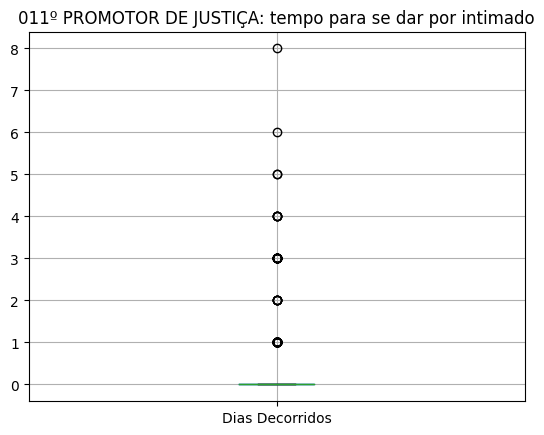

In [19]:
atos_filtrados_1.boxplot(column='Dias Decorridos')
plt.title(f'{cargo}: tempo para se dar por intimado')
plt.savefig('intimacao.png')
plt.show()

In [20]:
caminho_arquivo_excel = 'resumo.xlsx'

with pd.ExcelWriter(caminho_arquivo_excel) as writer:
    atos.to_excel(writer, sheet_name='Geral', index=False)
    atos_filtrados.to_excel(writer, sheet_name='Receb. pelo sistema', index=False)
    atos_filtrados_1.to_excel(writer, sheet_name='Pelo cargo', index=False)

# Análise de peticionamento

Obter o(s) arquivo(s) "peticoes.csv" na área própria do eSAJ.

In [21]:
# Estratégia para a leitura de múltiplos arquivos csv.
caminho = '/content/p*.csv'

arquivos_csv = glob.glob(caminho)

peticoes = pd.DataFrame()

for arquivo in arquivos_csv:
    df_temp = pd.read_csv (arquivo, sep = ';', on_bad_lines='skip')
    peticoes = pd.concat([peticoes, df_temp], ignore_index=True)

In [22]:
# Adequação dos dados
peticoes['Data/Hora'] = pd.to_datetime(peticoes['Data/Hora'], format='%d/%m/%Y %H:%M:%S')
peticoes

,Data/Hora,Foro,Tipo de petição,Número do processo,Classe,Assunto principal,Situação
0,2024-02-28 17:03:14,NaN,Intermediaria,1500087-34.2021.8.26.0554,Manifestação do MP,Estelionato,Petição cadastrada
1,2024-02-28 17:02:15,NaN,Intermediaria,1500215-11.2024.8.26.0599,Manifestação do MP,Furto,Petição cadastrada
2,2024-02-28 17:01:15,NaN,Intermediaria,1502164-07.2023.8.26.0599,Contrarrazões de Apelação,Tráfico de Drogas e Condutas Afins,Petição cadastrada
3,2024-02-28 16:17:53,NaN,Intermediaria,1500378-88.2024.8.26.0599,Denúncia,Roubo,Petição cadastrada
4,2024-02-28 16:00:13,NaN,Intermediaria,1500359-82.2024.8.26.0599,Denúncia,Tráfico de Drogas e Condutas Afins,Petição cadastrada
...,...,...,...,...,...,...,...
479,2023-12-01 14:08:11,NaN,Intermediaria,1501141-82.2023.8.26.0451,Manifestação do MP,Estupro de vulnerável,Petição cadastrada
480,2023-12-01 14:07:33,NaN,Intermediaria,1501665-23.2023.8.26.0599,Contrarrazões de Apelação,Tráfico de Drogas e Condutas Afins,Petição cadastrada
481,2023-12-01 14:06:57,NaN,Intermediaria,1501793-43.2023.8.26.0599,Denúncia,Tráfico de Drogas e Condutas Afins,Petição cadastrada
482,2023-12-01 14:06:20,NaN,Intermediaria,1501380-30.2023.8.26.0599,Contrarrazões de Apelação,Furto,Petição cadastrada


In [23]:
peticoes['Data provável disponib.'] = peticoes['Data/Hora']
peticoes['Data provável intimação'] = peticoes['Data/Hora']

# Percorre o dataframe de petições
for index, row in peticoes.iterrows():

  # Para cada linha, seleciona o "Número do processo" e "Data/Hora" do cadastro
  num_processo = row['Número do processo']
  data_hora = row['Data/Hora']

  # Cria um dataframe temporário das intimações do processo encontrado
  df_temp = atos[atos['Número do processo']==num_processo]

  # Cria uma lista ordenada de datas de intimações
  datas_de_disponibilizacao = sorted(df_temp['Disponibilização'].to_list(), reverse=True)
  datas_de_intimacao = sorted(df_temp['Data da intimação'].to_list(), reverse=True)

  for data in datas_de_disponibilizacao:
    if data < data_hora:
      peticoes.at[index, 'Data provável disponib.'] = data
      break

  for data in datas_de_intimacao:
    if data < data_hora:
      peticoes.at[index, 'Data provável intimação'] = data
      break

In [24]:
peticoes['Dias após disponibilização'] = (peticoes['Data/Hora'] - peticoes['Data provável disponib.']).dt.days

# Salva o dataframe em Excel
peticoes.to_excel("peticoes.xlsx", sheet_name='Correição', index=False)

display(peticoes)

,Data/Hora,Foro,Tipo de petição,Número do processo,Classe,Assunto principal,Situação,Data provável disponib.,Data provável intimação,Dias após disponibilização
0,2024-02-28 17:03:14,NaN,Intermediaria,1500087-34.2021.8.26.0554,Manifestação do MP,Estelionato,Petição cadastrada,2024-02-28,2024-02-28,0
1,2024-02-28 17:02:15,NaN,Intermediaria,1500215-11.2024.8.26.0599,Manifestação do MP,Furto,Petição cadastrada,2024-02-28,2024-02-28,0
2,2024-02-28 17:01:15,NaN,Intermediaria,1502164-07.2023.8.26.0599,Contrarrazões de Apelação,Tráfico de Drogas e Condutas Afins,Petição cadastrada,2024-02-28,2024-02-28,0
3,2024-02-28 16:17:53,NaN,Intermediaria,1500378-88.2024.8.26.0599,Denúncia,Roubo,Petição cadastrada,2024-02-28,2024-02-28,0
4,2024-02-28 16:00:13,NaN,Intermediaria,1500359-82.2024.8.26.0599,Denúncia,Tráfico de Drogas e Condutas Afins,Petição cadastrada,2024-02-28,2024-02-28,0
...,...,...,...,...,...,...,...,...,...,...
479,2023-12-01 14:08:11,NaN,Intermediaria,1501141-82.2023.8.26.0451,Manifestação do MP,Estupro de vulnerável,Petição cadastrada,2023-12-01,2023-12-01,0
480,2023-12-01 14:07:33,NaN,Intermediaria,1501665-23.2023.8.26.0599,Contrarrazões de Apelação,Tráfico de Drogas e Condutas Afins,Petição cadastrada,2023-12-01,2023-12-01,0
481,2023-12-01 14:06:57,NaN,Intermediaria,1501793-43.2023.8.26.0599,Denúncia,Tráfico de Drogas e Condutas Afins,Petição cadastrada,2023-12-01,2023-12-01,0
482,2023-12-01 14:06:20,NaN,Intermediaria,1501380-30.2023.8.26.0599,Contrarrazões de Apelação,Furto,Petição cadastrada,2023-12-01,2023-12-01,0


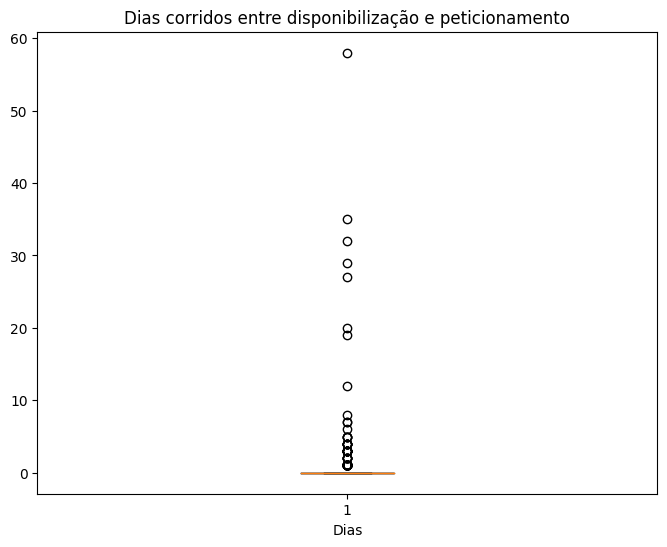

In [25]:
# Criar o boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(peticoes['Dias após disponibilização'])
plt.title('Dias corridos entre disponibilização e peticionamento')
plt.xlabel('Dias')
plt.savefig('petic_disponib.png')
plt.show()